### 삼성전자 종가 데이터를 Series로 생성하기
    

In [ ]:
'''
read_csv() 함수의 parameter

path : 경로
index_col : index 로 사용할 컬럼번호나 이름
header : 컬럼 이름으로 사용할 row의 인덱스번호 - 기본값은 0 임
squeeze : row 하나인 경우 Seriese 를 반환함 - 기본값은 False 임
'''

In [53]:
import pandas as pd

sscp_sr= pd.read_csv("data/삼성전자 종가.csv", index_col=0, squeeze=True, header=0)
print("sscp_sr :",type(sscp_sr))
sscp_sr.head()


sscp_sr : <class 'pandas.core.series.Series'>


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
Name: Close, dtype: int64

In [2]:
# read_csv()  함수를 실행할 때 squeeze parameter를 True로 지정하면
# DataFrame 객체가 아니고 Series 객체가 생성됨
# Date 는 index 가 되고 Close 만 data로 사용하게 됨
sscp_sr.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [3]:
# loc[index 명]  <-- 실제 data 를 반환함 : close price
sscp_sr.loc["2021-12-07"]

77400

In [4]:
# iloc[index 번호]  <-- 실제 data 를 반환함 : close price
# 100 번째 data 값 알아보기
sscp_sr.iloc[100]

49500

### Series 에 행 추가하기

In [5]:
sscp_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [6]:
# sscp_sr 에 있는 data 의 개수 : shape
sscp_sr.shape

(977,)

In [7]:
# 없는 index 이름을 지정해서 값을 할당하면 행이 추가됨
sscp_sr.loc["2021-12-24"] = 79000
sscp_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
2021-12-24    79000
Name: Close, Length: 978, dtype: int64

In [8]:
# 이미 존재하는 index 이름을 지정해서 값을 할당하면 행의 값이 변경(수정)됨
sscp_sr.loc["2021-12-17"] = 78230
sscp_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78230
2021-12-24    79000
Name: Close, Length: 978, dtype: int64

In [9]:
sscp_sr.describe()

count      978.000000
mean     57318.282209
std      14094.637471
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

### Series 연결하기

In [52]:
sscp1_sr = pd.read_excel("data/samsung_excel.xlsx", sheet_name="Sheet1", index_col=0, squeeze=True)
sscp2_sr = pd.read_excel("data/samsung_excel.xlsx", sheet_name="Sheet2", index_col=0, squeeze=True)

In [11]:
sscp1_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2019-12-23    55500
2019-12-24    55000
2019-12-26    55400
2019-12-27    56500
2019-12-30    55800
Name: Close, Length: 490, dtype: int64

In [12]:
sscp2_sr

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 492, dtype: int64

In [13]:
# ignore_index : 기본값은 False 
#              - True 로 하면 sscp3_sr 의 index 가 0, 1, 2... 로 지정됨
sscp3_sr = sscp1_sr.append(sscp2_sr, ignore_index=False)
sscp3_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

In [14]:
# 삼성전자의 고점과 저점
sscp_sr.max()

91000

In [15]:
sscp_sr.min()

37450

In [16]:
sscp_sr.index[sscp_sr.values == sscp_sr.max()]

Index(['2021-01-11'], dtype='object', name='Date')

In [17]:
sscp_sr.index[sscp_sr.values == sscp_sr.min()]

Index(['2019-01-04'], dtype='object', name='Date')

In [18]:
sscp_sr.iloc[sscp_sr.argmin()]

37450

In [19]:
sscp_sr.iloc[sscp_sr.argmax()]

91000

In [20]:
print(type(sscp_sr.index[sscp_sr.argmin()]))
sscp_sr.index[sscp_sr.argmin()]

<class 'str'>


'2019-01-04'

In [21]:
sscp_sr.index[sscp_sr.argmax()]

'2021-01-11'

### 삼성전자 수익률

In [51]:
sscp_sr= pd.read_csv("data/삼성전자 종가.csv", index_col=0, squeeze=True, header=0)
sscp_sr

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [36]:
sscp_sr.shift(1)

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [37]:
sscp_sr - sscp_sr.shift(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64

In [39]:
return_value = (sscp_sr - sscp_sr.shift(1)) / sscp_sr.shift(1)
return_value = return_value * 100
return_value

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [40]:
return_value.max()

10.470588235294118

In [41]:
return_value.index[return_value.argmax()]

'2020-03-24'

### NaN 값 삭제하기 - dropna() 메소드 사용

In [43]:
return_value = (sscp_sr - sscp_sr.shift(1)) / sscp_sr.shift(1)
return_value = return_value * 100
return_value

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [44]:
# 결측치 삭제하기
return_value.dropna()

Date
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
2018-01-09   -3.114187
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 976, dtype: float64

In [45]:
# 결측치 를 0 으로 바꾸기
return_value.fillna(0)

Date
2018-01-02    0.000000
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [46]:
# index 순서대로 정렬하기
return_value.sort_index(ascending=True)

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [47]:
return_value.sort_index()

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [48]:
return_value.sort_index(ascending=True).head(5)

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
Name: Close, dtype: float64

In [49]:
return_value[return_value.values >= 4]

Date
2018-03-06     4.026549
2018-09-14     4.086266
2018-11-02     4.744958
2019-03-21     4.086266
2020-03-20     5.704307
2020-03-24    10.470588
2020-04-17     4.897959
2020-06-03     6.031128
2020-06-16     4.408818
2020-07-28     5.395683
2020-11-16     4.905063
2020-11-23     4.327666
2020-12-24     5.277402
2021-01-08     7.117008
2021-02-25     4.024390
2021-11-22     5.196629
2021-12-01     4.347826
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

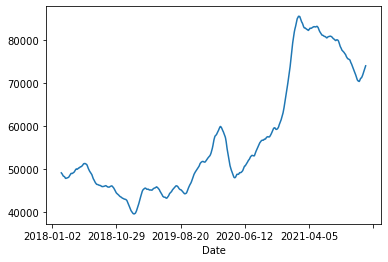

In [50]:
sscp_sr.rolling(window=30).mean().plot()